<a href="https://colab.research.google.com/github/MDedipya/churn-modelling/blob/main/movie_genre_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving description.txt to description (1).txt
Saving test_data.txt to test_data (1).txt
Saving test_data_solution.txt to test_data_solution (1).txt
Saving train_data.txt to train_data (1).txt


In [ ]:
import pandas as pd
train_df = pd.read_csv('train_data (1).txt', sep=' ::: ', engine='python')
test_df = pd.read_csv('test_data (1).txt', sep=' ::: ', engine='python')
test_solution_df = pd.read_csv('test_data_solution (1).txt', sep=' ::: ', engine='python')

display(train_df.head())
display(test_df.head())
display(test_solution_df.head())

,ID,title,genre,plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


,ID,title,plot
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),Before he was known internationally as a marti...


,ID,title,genre,plot
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...


In [ ]:
train_df = train_df[['plot', 'genre']].dropna()
display(train_df.head())

,plot,genre
0,Listening in to a conversation between his doc...,drama
1,A brother and sister with a past incestuous re...,thriller
2,As the bus empties the students for their fiel...,adult
3,To help their unemployed father make ends meet...,drama
4,The film's title refers not only to the un-rec...,drama


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['genre_encoded'] = le.fit_transform(train_df['genre'])

In [ ]:
print(train_df.columns)
train_df.head()

Index(['plot', 'genre', 'genre_encoded'], dtype='object')


,plot,genre,genre_encoded
0,Listening in to a conversation between his doc...,drama,8
1,A brother and sister with a past incestuous re...,thriller,24
2,As the bus empties the students for their fiel...,adult,1
3,To help their unemployed father make ends meet...,drama,8
4,The film's title refers not only to the un-rec...,drama,8


In [ ]:
print(train_df.columns)

Index(['plot', 'genre', 'genre_encoded'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['genre_encoded'] = le.fit_transform(train_df['genre'])

X = train_df['plot']
y = train_df['genre_encoded']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.4457253527621507
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.66      0.03      0.06      1443
           6       0.00      0.00      0.00       107
           7       0.54      0.90      0.67      2659
           8       0.38      0.89      0.53      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        5

In [ ]:
sample_plot = ["A superhero saves the city from a villain with super powers."]
sample_plot_vec = vectorizer.transform(sample_plot)
predicted_genre_encoded = model.predict(sample_plot_vec)
predicted_genre_encoded = le.inverse_transform(predicted_genre_encoded)
print(f'Predicted Genre: {predicted_genre_encoded[0]}')

Predicted Genre: comedy


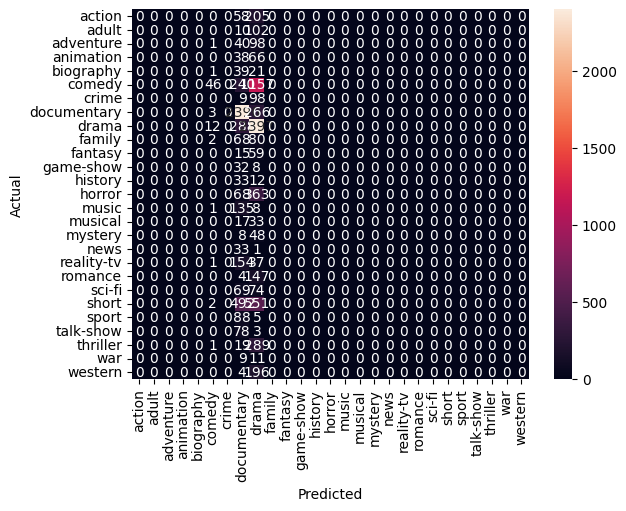

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
